In [1]:
# Data Analysis (creating questions & stories) Week 5

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from textblob import TextBlob

In [3]:
file_path = 'twcs.csv'
data_set = pd.read_csv('twcs.csv')

In [4]:
'''
Data Analysis steps:
1. Define the question
2. Define the ideal data set
3. Obtain data
4. Clean the data
5. Exploratory Data Analysis
6. Statistical Prediction/modeling
7. Interpret results
8. Challenge results
9. Communicate results
10. Build a Data Product

'''

'\nData Analysis steps:\n1. Define the question\n2. Define the ideal data set\n3. Obtain data\n4. Clean the data\n5. Exploratory Data Analysis\n6. Statistical Prediction/modeling\n7. Interpret results\n8. Challenge results\n9. Communicate results\n10. Build a Data Product\n\n'

In [5]:
'''
Step 1 - Define the questions:
What are the most common issues customer are facing based on their tweets to telecommunication companies?
How does response time correlate to customer satisfaction? 

Step 2 - Define the ideal data set:
Telecommunication companies such as VerizonSupport, Ask_Spectrum, sprintcare, ect.
'''

'\nStep 1 - Define the questions:\nWhat are the most common issues customer are facing based on their tweets to telecommunication companies?\nHow does response time correlate to customer satisfaction? \n\nStep 2 - Define the ideal data set:\nTelecommunication companies such as VerizonSupport, Ask_Spectrum, sprintcare, ect.\n'

In [6]:
# Step 3 - Obtain the data
data_set.head(50)

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0
5,6,sprintcare,False,Tue Oct 31 21:46:24 +0000 2017,@115712 Can you please send us a private messa...,"5,7",8.0
6,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN
7,11,sprintcare,False,Tue Oct 31 22:10:35 +0000 2017,@115713 This is saddening to hear. Please shoo...,NaN,12.0
8,12,115713,True,Tue Oct 31 22:04:47 +0000 2017,@sprintcare You gonna magically change your co...,"11,13,14",15.0
9,15,sprintcare,False,Tue Oct 31 20:03:31 +0000 2017,@115713 We understand your concerns and we'd l...,12,16.0


In [7]:
# Step 4 - Clean the data

In [8]:
# Handle missing values
data_set.dropna(subset=['text'], inplace=True)

In [9]:
# Convert 'created_at' to datetime
data_set['created_at'] = pd.to_datetime(data_set['created_at'])

In [10]:
# TODO more data cleaning

In [11]:
# Step 5 - Exploratory data analysis

In [12]:
# Explore distribution of inbound and outbound tweets
inbound_outbound_counts = data_set['inbound'].value_counts()

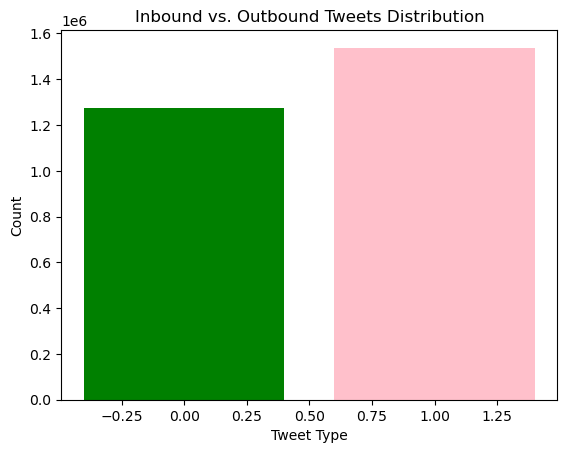

In [20]:
# Plot bar chart
plt.bar(inbound_outbound_counts.keys(), inbound_outbound_counts.values, color=['pink', 'green'])
plt.xlabel('Tweet Type')
plt.ylabel('Count')
plt.title('Inbound vs. Outbound Tweets Distribution')
plt.show()

In [ ]:
# Sentiment analysis 

In [ ]:
def sentiment_analysis(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

In [ ]:
data_set['sentiment'] = data_set['text'].apply(sentiment_analysis)

# Count the occurrences of each sentiment category
sentiment_counts = data_set['sentiment'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'pink', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Analysis Results')
plt.show()

In [22]:
# Step 6 - Statistical predictions & modeling

# TODO - more data cleaning, analyze results & present them in an organized manner

In [18]:
'''
NOTES
Example data question topics: focus on the right features of the data.
- airlines (delta, american airlines)
- telecommunication comapanies (t-mobile, sprint)
'''

'\nNOTES\nExample data question topics: focus on the right features of the data.\n- airlines (delta, american airlines)\n- telecommunication comapanies (t-mobile, sprint)\n'

In [19]:
'''
TODO:
Create some questions based on the data 

Use python data analytical libraries and see if you can answer your questions or not

Organize your work by step-by-step 
'''

'\nTODO:\nCreate some questions based on the data \n\nUse python data analytical libraries and see if you can answer your questions or not\n\nOrganize your work by step-by-step \n'